In [10]:
import csv
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from matplotlib import style
import datetime
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
import itertools
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

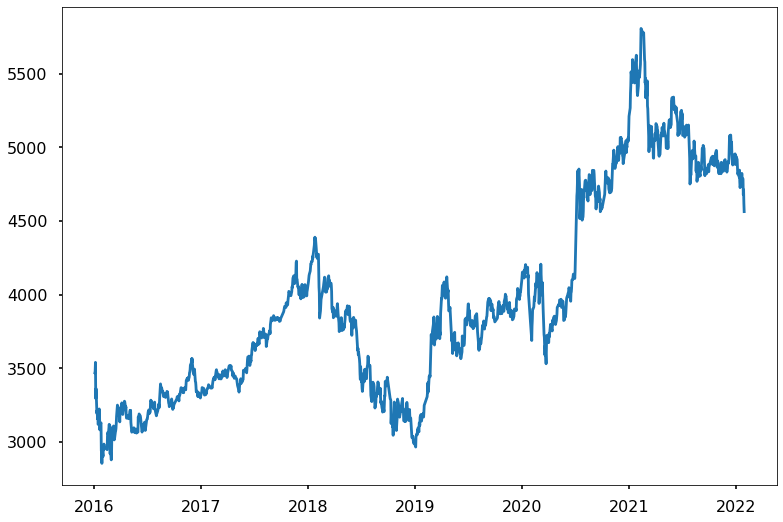

In [13]:
df = pd.read_csv('/Users/xujiarui/Desktop/data_2.csv',parse_dates = True, index_col=0, encoding = 'gb2312')
plt.plot(df)
plt.show()

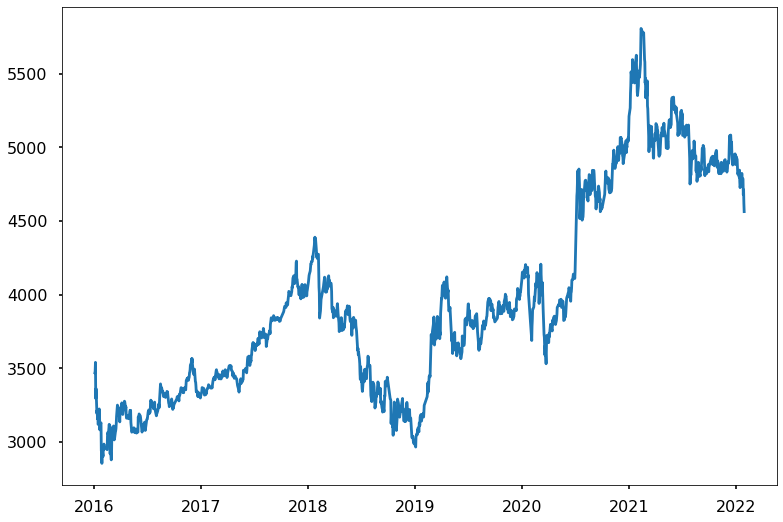

In [4]:
df = pd.read_csv('/Users/xujiarui/Desktop/data_2.csv',parse_dates = True, index_col=0, encoding = 'gb2312')
df
min_max_scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(df, columns=df.columns)
df.tail()
plt.plot(df)
plt.show()



<AxesSubplot:xlabel='data'>

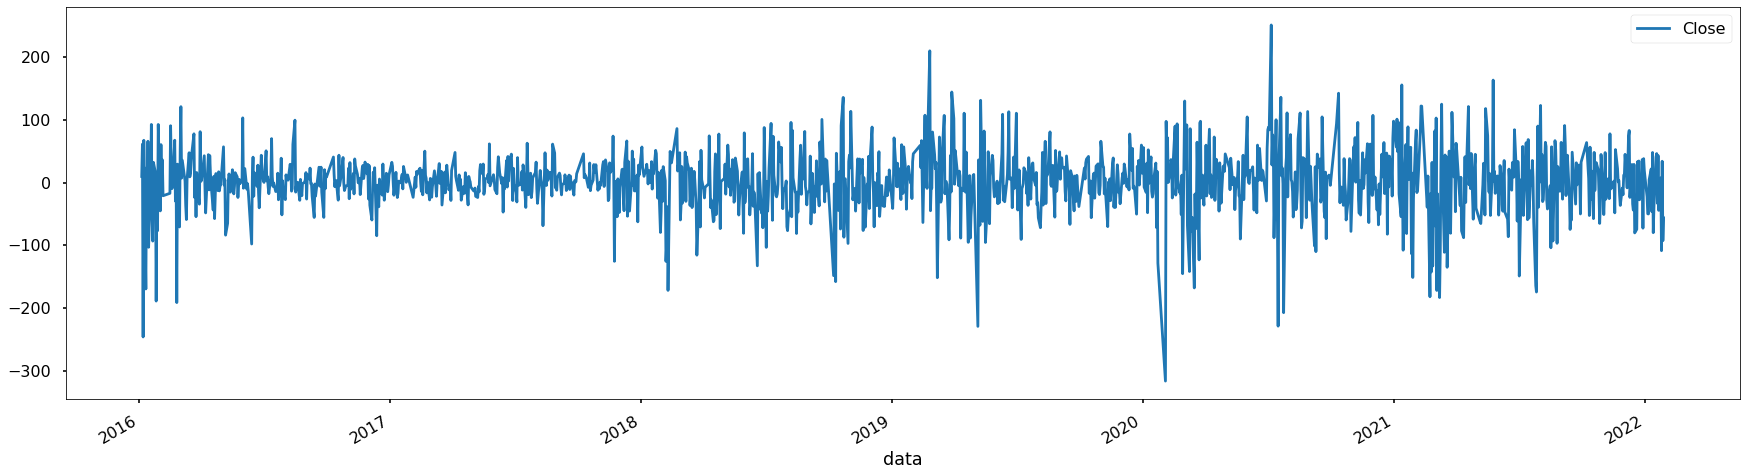

In [5]:
diff1= df.diff(1)#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure(figsize=(30,8))
ax1=fig.add_subplot(111)
diff1.plot(ax=ax1)


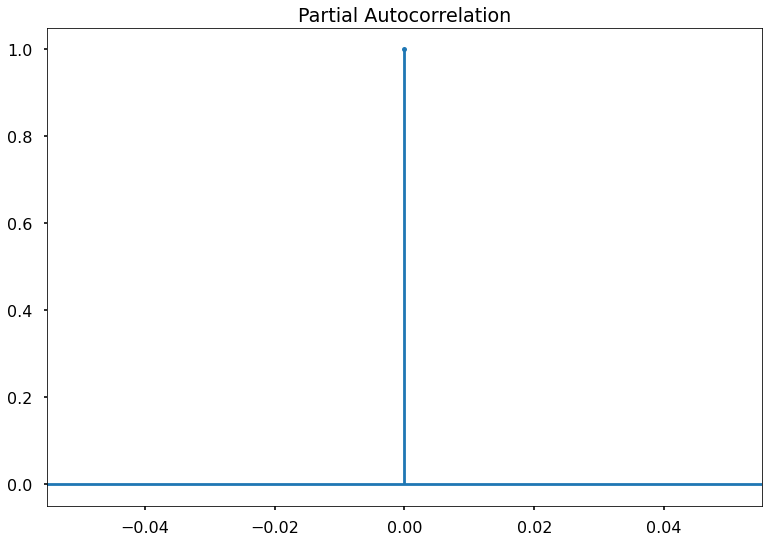

In [43]:

# fig = plt.figure(figsize=(1,6))

# ax1 = fig.add_subplot(111)
# fig = sm.graphics.tsa.plot_acf(diff1, lags=150,ax=ax1)
#nax1.xaxis.set_ticks_position('bottom')
# fig.tight_layout()
plot_pacf(diff1).show()

 


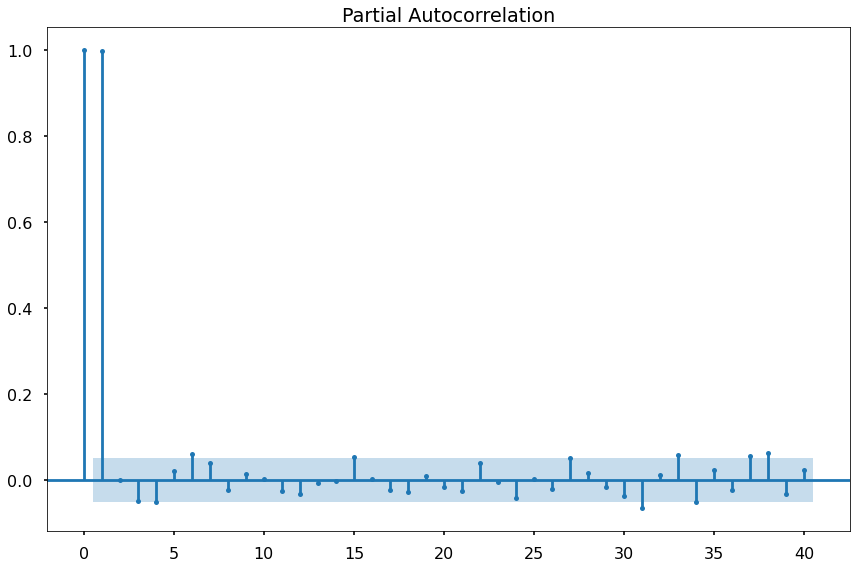

In [11]:
fig = plt.figure(figsize=(12,8))

ax2 = fig.add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

In [66]:
#4.建立模型——参数选择
arima200 = sm.tsa.ARIMA(df, order=(0,1,0)).fit()#(p,d,q)
#model_results = arima200.fit()
#遍历，寻找适宜的参数
import itertools
 
p_min = 0
d_min = 1
q_min = 0
p_max = 4
d_max = 1
q_max = 4
 
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(df, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30762D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   5.308D+00
  F =   5.3076166178598676     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.3

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30624D+00    |proj g|=  3.22942D-04

At iterate    5    f=  5.30624D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      7      1     0     0   1.776D-07   5.306D+00
  F =   5.3062392811277981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30681D+00    |proj g|=  3.07487D-04

At iterate    5    f=  5.30681D+00    |proj g|=  7.28306D-05

At iterate   10    f=  5.30681D+00    |proj g|=  3.19744D-06

At iterate   15    f=  5.30681D+00    |proj g|=  1.44773D-05

At iterate   20    f=  5.30681D+00    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     33      1     0     0   5.329D-07   5.307D+00
  F =   5.3068105547824969     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.30659D+00    |proj g|=  6.06537D-04

At iterate   10    f=  5.30658D+00    |proj g|=  1.59961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     22      1     0     0   3.553D-07   5.307D+00
  F =   5.3065822840958257     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30420D+00    |proj g|=  6.57518D-04

At iterate    5    f=  5.30418D+00    |proj g|=  3.00115D-04

At iterate   10    f=  5.30418D+00    |proj g|=  3.28626D-06

At iterate   15    f=  5.30418D+00    |proj g|=  2.30926D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     26      1     0     0   2.665D-07   5.304D+00
  F =   5.3041757792697117     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30694D+00    |proj g|=  8.09131D-05

At iterate    5    f=  5.30694D+00    |proj g|=  1.53655D-04

At iterate   10    f=  5.30694D+00    |proj g|=  2.87770D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   8.882D-08   5.307D+00
  F =   5.3069366933429922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30844D+00    |proj g|=  1.62090D-02

At iterate    5    f=  5.30731D+00    |proj g|=  1.43796D-04

At iterate   10    f=  5.30723D+00    |proj g|=  3.96581D-03

At iterate   15    f=  5.30669D+00    |proj g|=  1.00240D-03

At iterate   20    f=  5.30654D+00    |proj g|=  1.56994D-03

At iterate   25    f=  5.30623D+00    |proj g|=  2.23288D-04

At iterate   30    f=  5.30620D+00    |proj g|=  2.18492D-05

At iterate   35    f=  5.30620D+00    |proj g|=  8.17124D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30841D+00    |proj g|=  1.60997D-02

At iterate    5    f=  5.30728D+00    |proj g|=  2.48068D-04

At iterate   10    f=  5.30717D+00    |proj g|=  5.34124D-03

At iterate   15    f=  5.30660D+00    |proj g|=  3.60334D-04

At iterate   20    f=  5.30660D+00    |proj g|=  3.68860D-04

At iterate   25    f=  5.30647D+00    |proj g|=  1.88143D-03

At iterate   30    f=  5.30638D+00    |proj g|=  2.92086D-03

At iterate   35    f=  5.30618D+00    |proj g|=  3.00915D-04

At iterate   40    f=  5.30618D+00    |proj g|=  7.90479D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30836D+00    |proj g|=  1.76605D-02

At iterate    5    f=  5.30689D+00    |proj g|=  8.67750D-05

At iterate   10    f=  5.30688D+00    |proj g|=  7.94120D-04

At iterate   15    f=  5.30687D+00    |proj g|=  1.42020D-04

At iterate   20    f=  5.30684D+00    |proj g|=  3.21654D-03

At iterate   25    f=  5.30675D+00    |proj g|=  4.52971D-05

At iterate   30    f=  5.30675D+00    |proj g|=  1.82609D-04

At iterate   35    f=  5.30669D+00    |proj g|=  2.89342D-03

At iterate   40    f=  5.30658D+00    |proj g|=  9.13492D-04

At iterate   45    f=  5.30604D+00    |proj g|=  3.66400D-03

At iterate   50    f=  5.30514D+00    |proj g|=  9.25180D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   55    f=  5.30508D+00    |proj g|=  1.90674D-03

At iterate   60    f=  5.30507D+00    |proj g|=  3.51434D-03

At iterate   65    f=  5.30506D+00    |proj g|=  1.62199D-03

At iterate   70    f=  5.30505D+00    |proj g|=  2.41025D-03

At iterate   75    f=  5.30504D+00    |proj g|=  1.87379D-03

At iterate   80    f=  5.30494D+00    |proj g|=  7.18750D-03

At iterate   85    f=  5.30477D+00    |proj g|=  8.52607D-03

At iterate   90    f=  5.30475D+00    |proj g|=  2.30074D-03

At iterate   95    f=  5.30475D+00    |proj g|=  7.17826D-04

At iterate  100    f=  5.30474D+00    |proj g|=  4.25402D-03

At iterate  105    f=  5.30472D+00    |proj g|=  1.15839D-02
  ys=-1.464E-06  -gs= 4.244E-06 BFGS update SKIPPED

At iterate  110    f=  5.30472D+00    |proj g|=  1.80087D-03

At iterate  115    f=  5.30472D+00    |proj g|=  4.30234D-04

At iterate  120    f=  5.30472D+00    |proj g|=  3.20011D-04

At iterate  125    f=  5.30472D+00    |proj g|=  3.13962D-03

At iterate  130  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  205    f=  5.30470D+00    |proj g|=  1.57456D-03

At iterate  210    f=  5.30470D+00    |proj g|=  4.83524D-04

At iterate  215    f=  5.30470D+00    |proj g|=  2.73115D-04

At iterate  220    f=  5.30470D+00    |proj g|=  5.29532D-04

At iterate  225    f=  5.30470D+00    |proj g|=  1.07789D-03

At iterate  230    f=  5.30470D+00    |proj g|=  4.27214D-04

At iterate  235    f=  5.30470D+00    |proj g|=  3.69127D-04

At iterate  240    f=  5.30470D+00    |proj g|=  6.94556D-04

At iterate  245    f=  5.30470D+00    |proj g|=  2.71694D-04

At iterate  250    f=  5.30470D+00    |proj g|=  2.21512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30721D+00    |proj g|=  1.07540D-02

At iterate    5    f=  5.30684D+00    |proj g|=  2.33591D-05

At iterate   10    f=  5.30684D+00    |proj g|=  5.08571D-04

At iterate   15    f=  5.30683D+00    |proj g|=  1.10312D-04

At iterate   20    f=  5.30682D+00    |proj g|=  3.55680D-03

At iterate   25    f=  5.30675D+00    |proj g|=  5.46496D-04

At iterate   30    f=  5.30675D+00    |proj g|=  6.21725D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30767D+00    |proj g|=  8.68532D-03

At iterate    5    f=  5.30736D+00    |proj g|=  5.59286D-04

At iterate   10    f=  5.30719D+00    |proj g|=  1.96065D-03

At iterate   15    f=  5.30696D+00    |proj g|=  2.45031D-03

At iterate   20    f=  5.30684D+00    |proj g|=  9.83125D-04

At iterate   25    f=  5.30625D+00    |proj g|=  1.01235D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  5.30421D+00    |proj g|=  8.18368D-04

At iterate   35    f=  5.30365D+00    |proj g|=  3.82183D-03

At iterate   40    f=  5.30351D+00    |proj g|=  1.90932D-03

At iterate   45    f=  5.30315D+00    |proj g|=  1.14744D-03

At iterate   50    f=  5.30315D+00    |proj g|=  2.42739D-04

At iterate   55    f=  5.30314D+00    |proj g|=  8.19345D-04

At iterate   60    f=  5.30314D+00    |proj g|=  2.39808D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     64    100      2     0     0   5.329D-07   5.303D+00
  F =   5.3031434764761807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30764D+00    |proj g|=  1.03248D-02

At iterate    5    f=  5.30722D+00    |proj g|=  5.17275D-04

At iterate   10    f=  5.30703D+00    |proj g|=  7.41274D-04

At iterate   15    f=  5.30702D+00    |proj g|=  3.94440D-04

At iterate   20    f=  5.30701D+00    |proj g|=  8.99725D-05

At iterate   25    f=  5.30701D+00    |proj g|=  6.95444D-05

At iterate   30    f=  5.30701D+00    |proj g|=  5.96856D-05

At iterate   35    f=  5.30700D+00    |proj g|=  3.10862D-06

At iterate   40    f=  5.30700D+00    |proj g|=  6.09202D-04

At iterate   45    f=  5.30698D+00    |proj g|=  1.08713D-04

At iterate   50    f=  5.30689D+00    |proj g|=  4.51656D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   55    f=  5.30421D+00    |proj g|=  5.23928D-03

At iterate   60    f=  5.30413D+00    |proj g|=  4.63363D-04

At iterate   65    f=  5.30386D+00    |proj g|=  5.65157D-03

At iterate   70    f=  5.30362D+00    |proj g|=  1.65867D-03

At iterate   75    f=  5.30329D+00    |proj g|=  6.89377D-03

At iterate   80    f=  5.30308D+00    |proj g|=  1.12621D-03

At iterate   85    f=  5.30308D+00    |proj g|=  5.82112D-04

At iterate   90    f=  5.30304D+00    |proj g|=  3.53850D-04

At iterate   95    f=  5.30304D+00    |proj g|=  2.15206D-04

At iterate  100    f=  5.30304D+00    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30650D+00    |proj g|=  9.26841D-03

At iterate    5    f=  5.30609D+00    |proj g|=  1.59908D-03

At iterate   10    f=  5.30416D+00    |proj g|=  4.40705D-03

At iterate   15    f=  5.30353D+00    |proj g|=  1.72573D-03

At iterate   20    f=  5.30230D+00    |proj g|=  6.56701D-03

At iterate   25    f=  5.30220D+00    |proj g|=  8.11973D-04

At iterate   30    f=  5.30210D+00    |proj g|=  8.25118D-04

At iterate   35    f=  5.30200D+00    |proj g|=  3.90248D-03

At iterate   40    f=  5.30183D+00    |proj g|=  9.86145D-04

At iterate   45    f=  5.30182D+00    |proj g|=  7.59393D-05

At iterate   50    f=  5.30182D+00    |proj g|=  3.50830D-04

At iterate   55    f=  5.30182D+00    |proj g|=  2.72493D-04

At iterate   60    f=  5.30182D+00    |proj g|=  5.07150D-05

At iterate   65    f=  5.3

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30641D+00    |proj g|=  4.10783D-03

At iterate    5    f=  5.30638D+00    |proj g|=  9.70779D-05

At iterate   10    f=  5.30638D+00    |proj g|=  2.44249D-04

At iterate   15    f=  5.30637D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     19      1     0     0   1.776D-07   5.306D+00
  F =   5.3063748816651879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  5.30557D+00    |proj g|=  1.68754D-06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41    110      3     0     0   8.882D-07   5.306D+00
  F =   5.3055707800097176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30596D+00    |proj g|=  9.94707D-03

At iterate    5    f=  5.30562D+00    |proj g|=  3.47011D-04

At iterate   10    f=  5.30558D+00    |proj g|=  1.15339D-03

At iterate   15    f=  5.30554D+00    |proj g|=  2.01315D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  5.30433D+00    |proj g|=  8.37552D-04

At iterate   25    f=  5.30329D+00    |proj g|=  3.34914D-03

At iterate   30    f=  5.30314D+00    |proj g|=  2.37010D-03

At iterate   35    f=  5.30296D+00    |proj g|=  2.24620D-04

At iterate   40    f=  5.30296D+00    |proj g|=  2.26485D-05

At iterate   45    f=  5.30296D+00    |proj g|=  1.15463D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     82      2     0     0   8.882D-08   5.303D+00
  F =   5.3029598439731274     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30543D+00    |proj g|=  8.96492D-03

At iterate    5    f=  5.30505D+00    |proj g|=  1.70823D-03

At iterate   10    f=  5.30342D+00    |proj g|=  6.18652D-03

At iterate   15    f=  5.30288D+00    |proj g|=  5.19051D-04

At iterate   20    f=  5.30279D+00    |proj g|=  5.61329D-04

At iterate   25    f=  5.30277D+00    |proj g|=  1.34248D-03

At iterate   30    f=  5.30264D+00    |proj g|=  1.57510D-03

At iterate   35    f=  5.30248D+00    |proj g|=  2.76810D-03

At iterate   40    f=  5.30200D+00    |proj g|=  1.24546D-02

At iterate   45    f=  5.30187D+00    |proj g|=  2.23377D-04

At iterate   50    f=  5.30187D+00    |proj g|=  2.18936D-04

At iterate   55    f=  5.30187D+00    |proj g|=  8.40839D-04

At iterate   60    f=  5.30186D+00    |proj g|=  4.25437D-05

At iterate   65    f=  5.3

 This problem is unconstrained.



At iterate   20    f=  5.30265D+00    |proj g|=  3.64420D-04

At iterate   25    f=  5.30263D+00    |proj g|=  7.40563D-04

At iterate   30    f=  5.30253D+00    |proj g|=  2.43094D-03

At iterate   35    f=  5.30233D+00    |proj g|=  1.00018D-03

At iterate   40    f=  5.30231D+00    |proj g|=  7.99005D-04

At iterate   45    f=  5.30206D+00    |proj g|=  6.78853D-03

At iterate   50    f=  5.30182D+00    |proj g|=  1.54534D-03

At iterate   55    f=  5.30181D+00    |proj g|=  2.04903D-04

At iterate   60    f=  5.30181D+00    |proj g|=  1.04450D-04

At iterate   65    f=  5.30181D+00    |proj g|=  2.37677D-04

At iterate   70    f=  5.30181D+00    |proj g|=  1.00098D-04

At iterate   75    f=  5.30181D+00    |proj g|=  4.16556D-05

At iterate   80    f=  5.30181D+00    |proj g|=  9.05942D-06

At iterate   85    f=  5.30181D+00    |proj g|=  1.86517D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

In [79]:
results_bic
results_bic.to_csv('results_bic.csv')

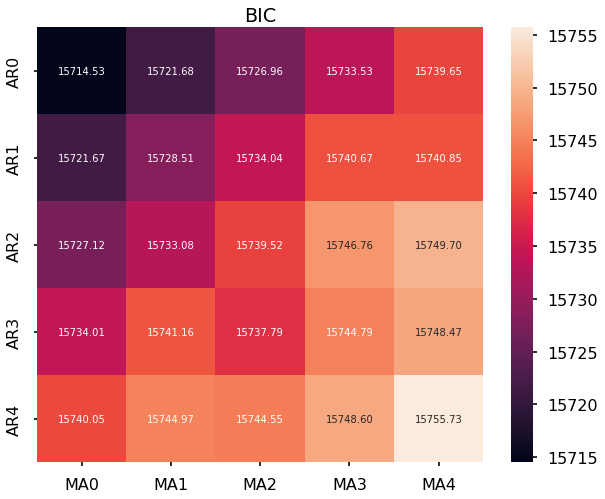

In [67]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()


In [107]:
import pandas as pd

data_aic = {
  "MA0": [15702.27,15704.12,15704.24,15705.82,15706.59],
  "MA1": [15704.13,15705.74,15706.13,15707.67,15702.61],
 "MA2": [15704.09,15705.86,15700.04,15701.37,15700.61],
 "MA3": [15705.34,15707.18,15701.39,15703.93,15701.47],
"MA4": [15706.18,15702.26,15700.75,15701.44,15702.56]
}

df_aic = pd.DataFrame(data_aic, index = ["AR0", "AR1", "AR2","AR3","AR4"])

print(df_aic)


          MA0       MA1       MA2       MA3       MA4
AR0  15702.27  15704.13  15704.09  15705.34  15706.18
AR1  15704.12  15705.74  15705.86  15707.18  15702.26
AR2  15704.24  15706.13  15700.04  15701.39  15700.75
AR3  15705.82  15707.67  15701.37  15703.93  15701.44
AR4  15706.59  15702.61  15700.61  15701.47  15702.56


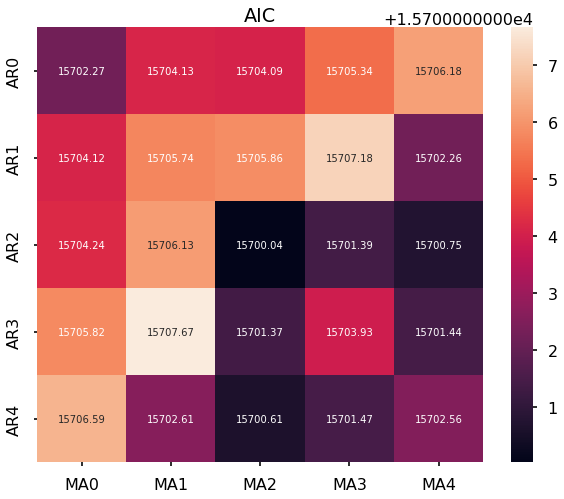

In [108]:

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_aic,
                 mask=df_aic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('AIC')
plt.show()



In [109]:

#模型评价准则
train_results = sm.tsa.arma_order_select_ic(df, ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)


AIC (2, 1)
BIC (2, 0)


In [63]:
stock=df
feanum=1
window=5
seq_len=window
amount_of_features = len(stock.columns)#有几列
data = stock.values#pd.DataFrame(stock) 表格转化为矩阵
sequence_length = seq_len + 1#序列长度+1
result = []
for index in range(len(data) - sequence_length):#循环 数据长度-时间窗长度 次
    result.append(data[index: index + sequence_length])#第i行到i+5
result = np.array(result)#得到样本，样本形式为 window*feanum
cut=150#分训练集测试集 最后cut个样本为测试集
train = result[:-cut, :]
x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[-cut:, :-1]
y_test = result[-cut:, -1][:,-1]
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

In [64]:
arma_mod20 = sm.tsa.ARMA(df,(1,0)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30892D+00    |proj g|=  1.12799D-04

At iterate    5    f=  5.30892D+00    |proj g|=  1.20792D-05

At iterate   10    f=  5.30890D+00    |proj g|=  6.75016D-05

At iterate   15    f=  5.30875D+00    |proj g|=  3.09974D-05

At iterate   20    f=  5.30875D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21     50      1     0     0   3.553D-07   5.309D+00
  F =   5.3087481828201009     

CONVERG

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


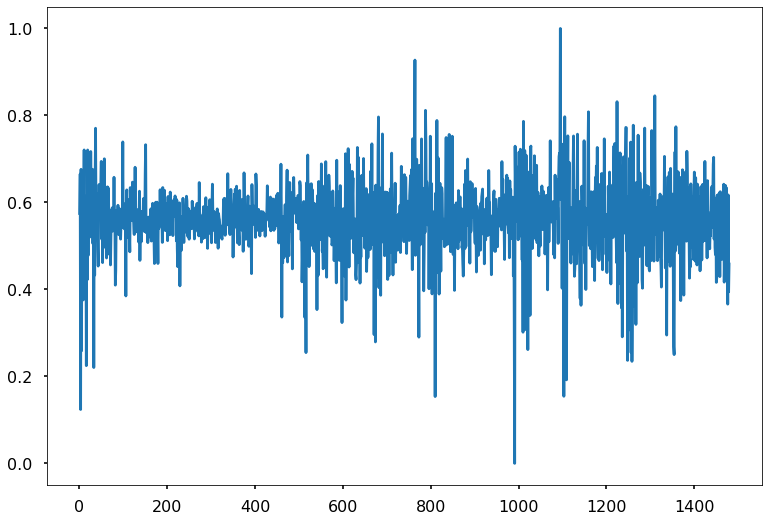

In [132]:
min_max_scaler = preprocessing.MinMaxScaler()
df1=min_max_scaler.fit_transform(diff1)
df1 = pd.DataFrame(df1, columns=diff1.columns)
df1.tail()
plt.plot(df1)

In [138]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
model=ARIMA(df,(2,1,2)).fit()
model.summary2()
forecast=model.forecast(5)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68247D+00    |proj g|=  1.78751D-01

At iterate    5    f= -2.68249D+00    |proj g|=  2.75587D-01

At iterate   10    f= -2.68333D+00    |proj g|=  1.19160D+00

At iterate   15    f= -2.68357D+00    |proj g|=  1.67645D-02


 This problem is unconstrained.



At iterate   20    f= -2.68360D+00    |proj g|=  2.03437D-04

At iterate   25    f= -2.68360D+00    |proj g|=  2.59935D-02

At iterate   30    f= -2.68366D+00    |proj g|=  3.30018D-01

At iterate   35    f= -2.68419D+00    |proj g|=  2.09238D-01

At iterate   40    f= -2.68423D+00    |proj g|=  2.38065D-01

At iterate   45    f= -2.68432D+00    |proj g|=  1.72755D-03

At iterate   50    f= -2.68433D+00    |proj g|=  4.42198D-02

At iterate   55    f= -2.68454D+00    |proj g|=  1.37277D-01

At iterate   60    f= -2.68471D+00    |proj g|=  1.23921D-02

At iterate   65    f= -2.68471D+00    |proj g|=  6.97442D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [9]:
import statsmodels.tsa.stattools as st
AIC=st.arma_order_select_ic(df,max_ar=4,max_ma=4,ic='aic')['aic_min_order']
AIC
BIC=st.arma_order_select_ic(df,max_ar=4,max_ma=4,ic='bic')['bic_min_order']
BIC
HQIC=st.arma_order_select_ic(df,max_ar=4,max_ma=4,ic='hqic')['hqic_min_order']
HQIC

(1, 0)